KeyboardInterrupt: 

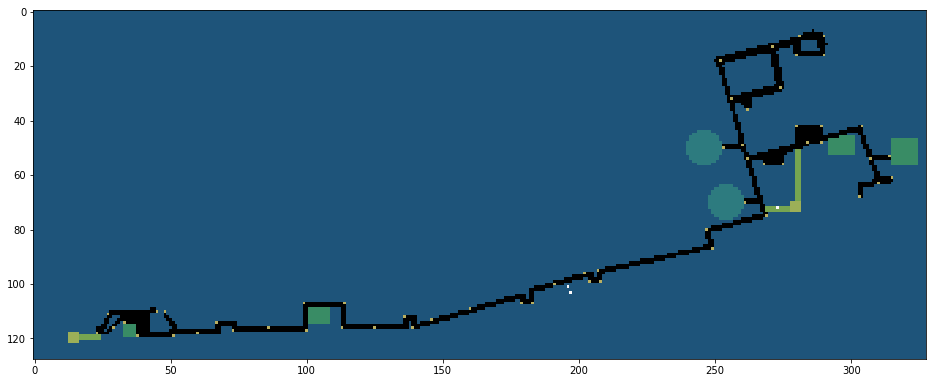

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython import display
import time
import pkt2robotMatrix
#from simulation import *

class Simulation:
    def __init__(self, mapMatrix, robotsCount):
        self.mapMatrix = mapMatrix
        self.robotsCount = robotsCount
        self.simulationTime = 0
        self.robots = pkt2robotMatrix.pkt2robotMatrix(self.mapMatrix, robotsCount)

    def show(self):
        maze = pd.read_csv('mapka_s101.csv').values
        for robot in self.robots:
            try:
                maze[robot.pos[0], robot.pos[1]] = 11
            except IndexError:
                print("error")
            
        plt.imshow(np.transpose(maze), cmap="gist_earth")
        display.clear_output(wait=True)
        display.display(plt.gcf())
        time.sleep(0.01) 

    def checkIfReady(self):
        for robot in self.robots:
            if robot.pos != robot.start_position and robot.current_path is None:
                return False
        return True
     
    #def report() - Domi napisała
    
    def step(self):
        result = self.checkIfReady()
        print('result {}'.format(result))
        if result:
            self.show()
            for robot in self.robots:
                print('before {}'.format(robot.pos))
                robot.next_step()
                print('after {}'.format(robot.pos))
                time.sleep(0.01)
                self.simulationTime += 1

if __name__ == '__main__':
    plt.figure(figsize=(16,16))
    maze = pd.read_csv('mapka_s111.csv').values
    sim = Simulation(maze, 3)
    for i in range(500):
        sim.step()
    